<a href="https://colab.research.google.com/github/chaitu-ml/Machine-learning-python/blob/master/Machine_Learning_based_Password_Strength_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Machine Learning based Password strength checking***

In [23]:
import numpy as np
import random
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
def getTokens(inputString):
	tokens = []
	for i in inputString:
		tokens.append(i)
	return tokens

In [25]:
filepath = '/content/sample_data.csv'
data = pd.read_csv(filepath,',',error_bad_lines=False)

data = pd.DataFrame(data)
passwords = np.array(data)

In [26]:
random.shuffle(passwords) 
y = [d[1] for d in passwords] 
allpasswords= [d[0] for d in passwords] 

In [27]:
vectorizer = TfidfVectorizer(tokenizer=getTokens) 
X = vectorizer.fit_transform(allpasswords)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #splitting

In [29]:
lgs = LogisticRegression(penalty='l2',multi_class='ovr') 
lgs.fit(X_train, y_train) #training
print(lgs.score(X_test, y_test))  #testing

0.795935296557445


In [31]:
X_predict = ['123456','abcdef','0000000','chaitanya','Chaitanya@#&20','Chaitu20','abababab','password','admin','8688893737','20052001']
X_predict = vectorizer.transform(X_predict)
y_Predict = lgs.predict(X_predict)
print (y_Predict)

['1' '1' '0' '1' '2' '1' '0' '1' '0' '1' '1']


In [32]:
y_pred = lgs.predict(X_test)
y_pred

array(['1', '1', '1', ..., '1', '1', '1'], dtype='<U23')

***confusion matrix and accuracy*** 

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[  34  278    0]
 [  22 1743   33]
 [   2  157  142]]
0.795935296557445


**classification report**

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.11      0.18       312
           1       0.80      0.97      0.88      1798
           2       0.81      0.47      0.60       301

    accuracy                           0.80      2411
   macro avg       0.73      0.52      0.55      2411
weighted avg       0.77      0.80      0.75      2411



**confusion matrix**

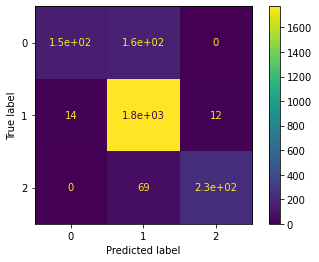

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)
plt.show()